# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [72]:
#create df for cities

city_df = pd.DataFrame(columns=["City","Country"])

#generate random cities

for x in range(1500):
    lat, lon = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat,lon)
    city_df = city_df.append({"City": city.city_name,"Country": city.country_code}, ignore_index=True)
    
#city_df['City'].nunique()
city_df = city_df.drop_duplicates(subset="City").reset_index()
city_df.count()

index      619
City       619
Country    619
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
#create df to hold api data

column_names = ["City", "Country", "Temperature", "Cloudiness", "Humidity", "Wind Speed", "Latitude", "Longitude", "Date"]
new_city = pd.DataFrame(columns=column_names)

#apicall

url = "https://api.openweathermap.org/data/2.5/weather?"

row = 1

print('getting data')
for index, row in city_df.iterrows():
    city1 = row["City"]
    url1 = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city1.replace(" ","+")
    city_data = requests.get(url1).json()
    
    if city_data["cod"] == "404":
       print("City not found, skipping...")
    
    else:
       new_city.set_value(index, "City", city_data["name"])
       new_city.set_value(index, "Country", city_data["sys"]["country"])
       new_city.set_value(index, "Temperature", city_data["main"]["temp"])
       new_city.set_value(index, "Latitude", city_data["coord"]["lat"])
       new_city.set_value(index, "Longitude", city_data["coord"]["lon"])
       new_city.set_value(index, "Humidity", city_data["main"]["humidity"])
       new_city.set_value(index, "Cloudiness", city_data["clouds"]["all"])
       new_city.set_value(index, "Wind Speed", city_data["wind"]["speed"])
        
       print("Proceesing" , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
       row_count += 1

getting data


/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] acc

------------------------
Proceesing: City #  56  |  Pangnirtung CA
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=pangnirtung
------------------------
Proceesing: City #  57  |  Avarua CK
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=avarua
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  58  |  Ushuaia AR
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=ushuaia
------------------------
Proceesing: City #  59  |  Merauke ID
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=merauke
------------------------
Proceesing: City #  60  |  Anadyr RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=anadyr
------------------------
Proceesing: City #  61  |  Bluff AU
http

City not found, skipping...
------------------------
Proceesing: City #  101  |  Omsukchan RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=omsukchan
------------------------
Proceesing: City #  102  |  Sisimiut GL
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=sisimiut
------------------------
Proceesing: City #  103  |  Troitskoye RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=troitskoye
------------------------
Proceesing: City #  104  |  Khandyga RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=khandyga
City not found, skipping...
------------------------
Proceesing: City #  105  |  Punta Arenas CL
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=punta+arenas
------------------------
Proceesing: Cit

------------------------
Proceesing: City #  146  |  Stokmarknes NO
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=stokmarknes
------------------------
Proceesing: City #  147  |  Cherskiy RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=cherskiy
------------------------
Proceesing: City #  148  |  Lumeje AO
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=lumeje
------------------------
Proceesing: City #  149  |  Tiksi RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=tiksi
------------------------
Proceesing: City #  150  |  Cap Malheureux MU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=cap+malheureux
------------------------
Proceesing: City #  151  |  Chuy UY
https://api.openweathermap.org/data/2.5/w

------------------------
Proceesing: City #  192  |  Beloha MG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=beloha
------------------------
Proceesing: City #  193  |  Gorom-Gorom BF
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=gorom-gorom
------------------------
Proceesing: City #  194  |  Bethel US
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=bethel
------------------------
Proceesing: City #  195  |  Road Town VG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=road+town
------------------------
Proceesing: City #  196  |  Lasa CY
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=lasa
------------------------
Proceesing: City #  197  |  Maragheh IR
https://api.openweathermap.org/data/2.5/weather?appid

------------------------
Proceesing: City #  238  |  Salinopolis BR
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=salinopolis
------------------------
Proceesing: City #  239  |  Martapura ID
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=martapura
------------------------
Proceesing: City #  240  |  Namibe AO
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=namibe
------------------------
Proceesing: City #  241  |  Great Falls US
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=great+falls
------------------------
Proceesing: City #  242  |  Nhulunbuy AU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=nhulunbuy
------------------------
Proceesing: City #  243  |  Vilyuysk RU
https://api.openweathermap.org/da

------------------------
Proceesing: City #  284  |  Christiansburg US
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=christiansburg
------------------------
Proceesing: City #  285  |  Mount Gambier AU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=mount+gambier
------------------------
Proceesing: City #  286  |  Lachhmangarh IN
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=lachhmangarh
------------------------
Proceesing: City #  287  |  Belaya Gora RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=belaya+gora
------------------------
Proceesing: City #  288  |  Milkovo BG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=milkovo
City not found, skipping...
------------------------
Proceesing: City #  289

------------------------
Proceesing: City #  330  |  Marawi PH
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=marawi
------------------------
Proceesing: City #  331  |  Margate AU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=margate
------------------------
Proceesing: City #  332  |  Saint-Francois FR
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=saint-francois
------------------------
Proceesing: City #  333  |  Vanimo PG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=vanimo
------------------------
Proceesing: City #  334  |  Balabac PH
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=balabac
------------------------
Proceesing: City #  335  |  Mahibadhoo MV
https://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City #  376  |  Lompoc US
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=lompoc
------------------------
Proceesing: City #  377  |  Bajos de Haina DO
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=bajos+de+haina
------------------------
Proceesing: City #  378  |  Keetmanshoop NA
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=keetmanshoop
------------------------
Proceesing: City #  379  |  Joensuu FI
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=joensuu
------------------------
Proceesing: City #  380  |  Dicabisagan PH
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=dicabisagan
------------------------
Proceesing: City #  381  |  Henties Bay NA
https://api.openweathe

------------------------
Proceesing: City #  422  |  Pokhara NP
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=pokhara
------------------------
Proceesing: City #  423  |  Havre-Saint-Pierre CA
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=havre-saint-pierre
------------------------
Proceesing: City #  424  |  Morondava MG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=morondava
------------------------
Proceesing: City #  425  |  Half Moon Bay US
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=half+moon+bay
------------------------
Proceesing: City #  426  |  Kushima JP
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=kushima
City not found, skipping...
------------------------
Proceesing: City #  427  |  W

------------------------
Proceesing: City #  467  |  Fare PF
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=fare
------------------------
Proceesing: City #  468  |  Taoudenni ML
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=taoudenni
------------------------
Proceesing: City #  469  |  Walvis Bay NA
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=walvis+bay
------------------------
Proceesing: City #  470  |  Marsa Matruh EG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=marsa+matruh
------------------------
Proceesing: City #  471  |  Tshikapa CD
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=tshikapa
------------------------
Proceesing: City #  472  |  Lima PE
https://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City #  513  |  Deputatskiy RU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=deputatskiy
City not found, skipping...
------------------------
Proceesing: City #  514  |  Awbari LY
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=awbari
City not found, skipping...
------------------------
Proceesing: City #  515  |  Liwale TZ
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=liwale
------------------------
Proceesing: City #  516  |  Akropong GH
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=akropong
------------------------
Proceesing: City #  517  |  Wanning AT
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=wanning
------------------------
Proceesing: City #  518  |  Manii

------------------------
Proceesing: City #  558  |  Flinders AU
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=flinders
------------------------
Proceesing: City #  559  |  Nova Mayachka UA
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=nova+mayachka
------------------------
Proceesing: City #  560  |  Qrendi MT
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=qrendi
------------------------
Proceesing: City #  561  |  Qaqortoq GL
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=qaqortoq
------------------------
Proceesing: City #  562  |  Marica BR
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=marica
------------------------
Proceesing: City #  563  |  Cortez US
https://api.openweathermap.org/data/2.5/weath

City not found, skipping...
------------------------
Proceesing: City #  604  |  Kijang KR
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=kijang
City not found, skipping...
------------------------
Proceesing: City #  605  |  Dibulla CO
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=dibulla
------------------------
Proceesing: City #  606  |  Popondetta PG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=popondetta
------------------------
Proceesing: City #  607  |  Saysain PH
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=saysain
------------------------
Proceesing: City #  608  |  Kieta PG
https://api.openweathermap.org/data/2.5/weather?appid=7a2dc34dc19171e1b3a489eaef5e123c&units=IMPERIAL&q=kieta
------------------------
Proceesing: City #  609  |  Swellendam 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
new_city.to_csv("city_weather.csv",index=False)

In [76]:
new_city.head()

,City,Country,Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude,Date
0,Pangnirtung,CA,-25.61,5,67,6.2,66.15,-65.72,NaN
1,Avarua,CK,78.8,75,94,3.36,-21.21,-159.78,NaN
4,Ushuaia,AR,53.6,75,81,20.8,-54.81,-68.31,NaN
5,Merauke,ID,78.45,100,100,11.45,-8.49,140.4,NaN
6,Anadyr,RU,-2.21,75,77,8.95,64.73,177.51,NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

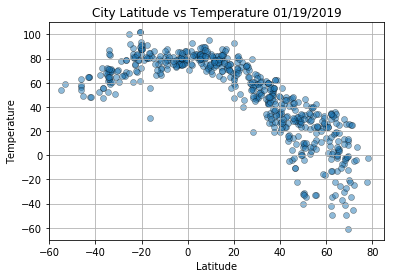

In [159]:
plt.scatter(new_city["Latitude"],
            new_city["Temperature"],
            edgecolor="black",
            linewidths=.5,
            cmap="plasma",
            alpha=.5,
            label="City")


plt.title(f"City Latitude vs Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,85])
plt.ylim([-70,110])

plt.show()

#### Latitude vs. Humidity Plot

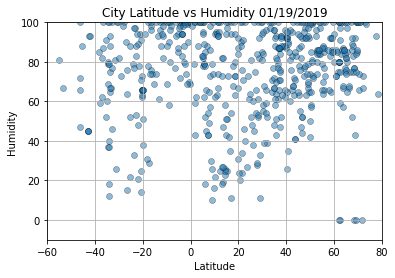

In [151]:
plt.scatter(new_city["Latitude"],
            new_city["Humidity"],
            edgecolor="black",
            linewidths=.5,
            cmap="plasma",
            alpha=.5,
            label="City")


plt.title(f"City Latitude vs Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,80])
plt.ylim([-10,100])

plt.show()

#### Latitude vs. Cloudiness Plot

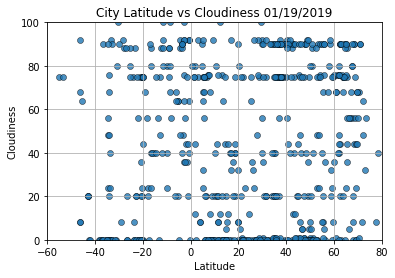

In [153]:
plt.scatter(new_city["Latitude"],
            new_city["Cloudiness"],
            edgecolor="black",
            linewidths=.5,
            cmap="plasma",
            alpha=.8,
            label="City")


plt.title(f"City Latitude vs Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,80])
plt.ylim([-0,100])

plt.show()

#### Latitude vs. Wind Speed Plot

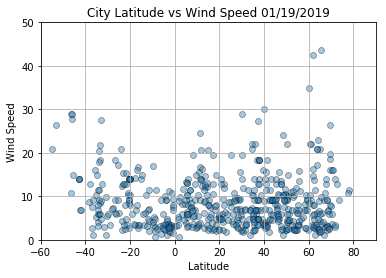

In [152]:
plt.scatter(new_city["Latitude"],
            new_city["Wind Speed"],
            edgecolor="black",
            linewidths=.8,
            cmap="plasma",
            alpha=.4,
            label="City")


plt.title(f"City Latitude vs Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([-0,50])

plt.show()